#### Introduction to Clustering
- Distinguish between supervised learning and unsupervised learning
- Explain the concept of clustering
- Implement k-means clustering algorithms using built-in Python packages
- Calculate the Silhouette Score for your data

> >  The algorithm optimizes** the groups by minimizing the within-cluster variation (also known as inertia)** such that the sum of the within-cluster variations across all k clusters is as small as possible.

> Different runs of k-means will result in slightly different cluster assignments because k-means randomly assigns each observation to one of the k clusters to kick off the clustering process. k-means does this random initialization to speed up the clustering process.

> This is one reason why clustering should be performed on dimensionality-reduced datasets—the clustering algorithms generally perform better, both in terms of time and clustering accuracy, on dimensionality-reduced datasets.

> Clustering has many applications. For example, in credit card fraud detection, clustering can group fraudulent transactions together, separating them from normal transactions. Or, if we had only a few labels for the observations in our dataset, we could use clustering to group the observations first (without using labels). Then, we could transfer the labels of the few labeled observations to the rest of the observations within the same group. This is a form of transfer learning, a rapidly growing field in machine learning.


> In areas such as online and retail shopping, marketing, social media, recommender systems for movies, music, books, dating, etc., clustering can group similar people together based on their behavior. Once these groups are established, business users will have better insight into their user base and can craft targeted business strategies for each of the distinct groups.


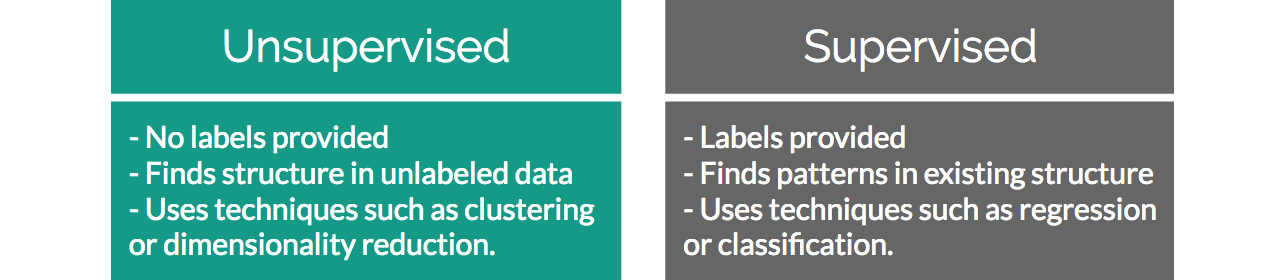

#### Introduction to k-means Clustering
 k-means works by searching for K clusters in your data and the workflow is actually quite intuitive –
 
#####  NO-MATH K-MEANS WALKTHROUGH
Here is the no-math algorithm of k-means clustering:

2. Pick K centroids (K = expected distinct # of clusters).
3. Randomly place K centroids anywhere amongst your existing training data.
4. Calculate the Euclidean distance from each centroid to all the points in your training data.
5. Training data points get grouped in with their nearest centroid.
6. Amongst the data points grouped into each centroid, calculate the mean data point and move your centroid to that location.
7. Repeat this process until convergence, or when the membership in each group no longer changes.

Figure : Reading from left to right – red points are randomly initialized centroids, and the closest data points are assigned to groupings of each centroid

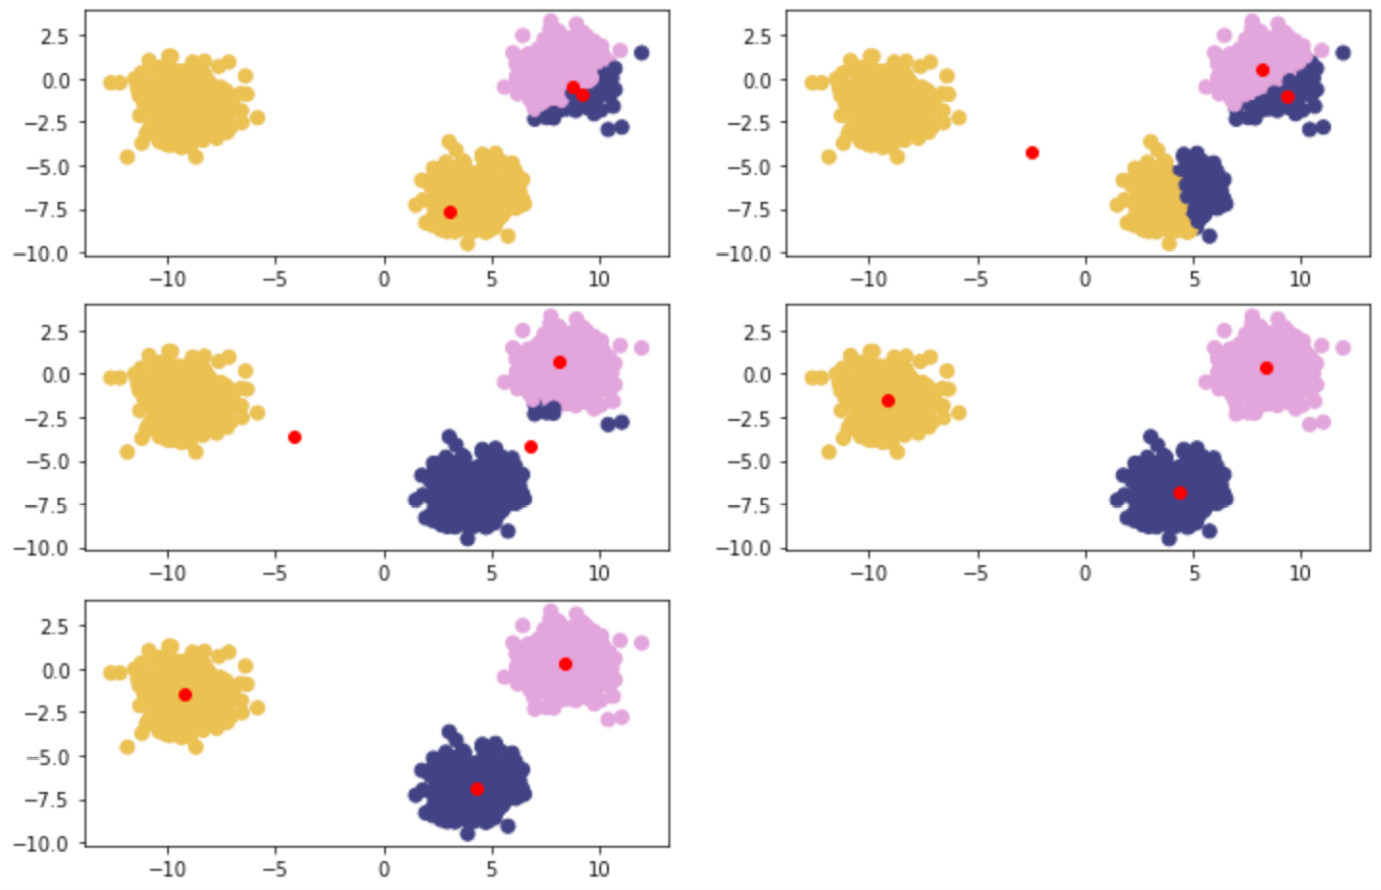

##### The key component at play is the Euclidean distance formula:
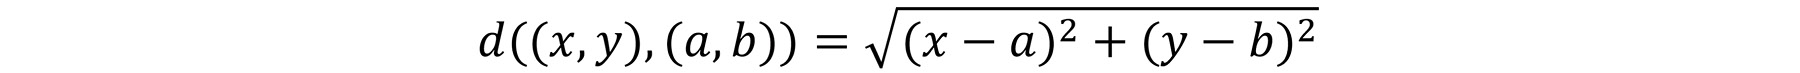

- Centroids are randomly set at the beginning as points in your n-dimensional space. 
- Euclidean distance relies on diagonals due to it being based on Pythagorean theorem

> math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

#### ALTERNATIVE DISTANCE METRIC – MANHATTAN DISTANCE

##### Manhattan distance
>  Manhattan distance constrains distance to only right angles. The formula for Manhattan distance is as follows:

- Here, `pi-qi`  are vectors as in Euclidean distance. 

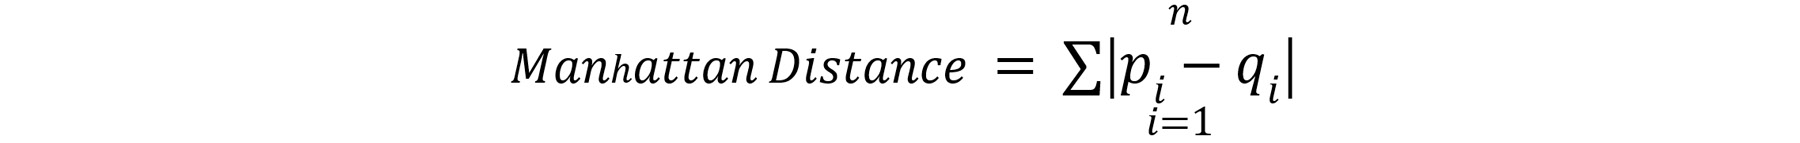

> In practice, Manhattan distance may outperform Euclidean distance when it comes to higher dimensional data.


#CLUSTERING PERFORMANCE: 
###### SILHOUETTE SCORE
-  we can also use Silhouette Scores to find optimal "K" numbers of clusters for our unsupervised learning methods.
- The Silhouette metric works by analyzing how well a point fits within its cluster. The metric ranges from -1 to 1 – 
> If the average silhouette score across your clustering is one, then you will have achieved perfect clusters and there will be minimal confusion about which point belongs where.

Mathematically, the Silhouette Score calculation is quite straightforward via the Simplified Silhouette Index (SSI), 
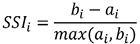
as  where 
ai -> is the distance from point i to its own cluster centroid and
bi -> is the distance from point i to the nearest cluster centroid.

> The intuition captured here is that  represents how cohesive point i's cluster is as a clear cluster, and  represents how far apart the clusters lie.

#### Hierarchical Clustering

# 1. Agglomerative Hierarchical Clustering
- `One way to approach hierarchical clustering is by starting with each data point serving as its own cluster and recursively joining the similar points together to form clusters – this is known as agglomerative hierarchical clustering. `

> Eventually, by grouping individual records from the data with their most similar records recursively, you end up building a hierarchy from the bottom up. The individual single-member clusters join together into one single cluster at the top of our hierarchy.

###### STEPS TO PERFORM HIERARCHICAL CLUSTERING
1. - Given n sample data points, view each point as an individual "cluster" with just that one point as a member.
	- Clusters (4): [ (1,7) ], [ (-5,9) ], [ (-9,4) ] , [ (4, -2) ]
	- Centroids (4): [ (1,7) ], [ (-5,9) ], [ (-9,4) ] , [ (4, -2) ]
2. - Calculate the pairwise Euclidean distance between the centroids of all the clusters in your data.
    - 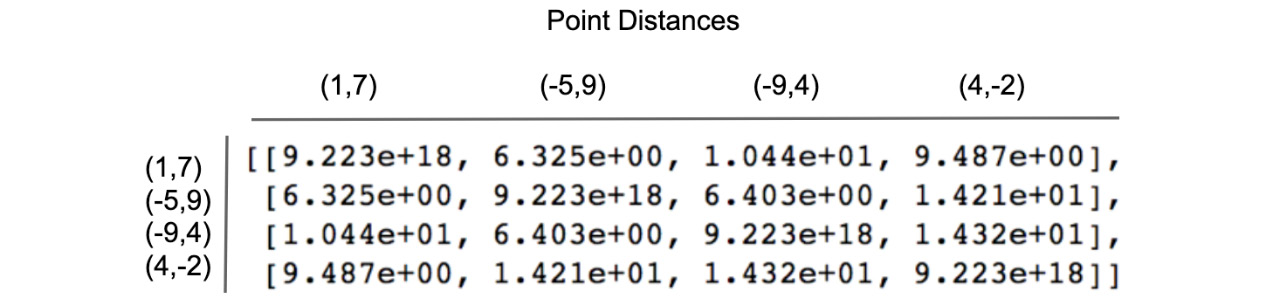




3. - Group the closest point pairs together.
    -In this case, points [1,7] and [-5,9] join into a cluster since they are closest, with the remaining two points left as single-member clusters:
    - 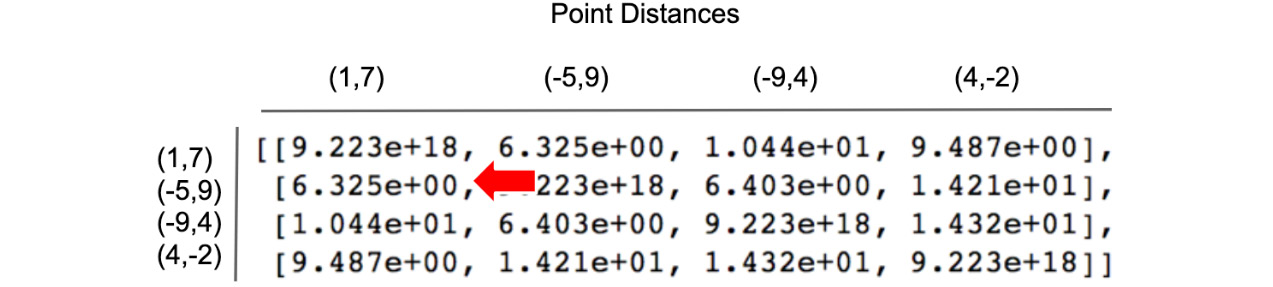
    > Here are the resulting three clusters:

        [ [1,7], [-5,9] ]

        [-9,4]

        [4,-2]
     > mean([ [1,7], [-5,9] ]) = [-2,8]
      
     > Add the centroid to the two single-member centroids and recalculate the distances.
Clusters (3):

1. [ [1,7], [-5,9] ]

3. [-9,4]

5. [4,-2]1. 

Centroids (3):

- [-2,8]

- [-9,4]

- [4,-2]



4. - Repeat Step 2 and Step 3 until you reach a single cluster containing all the data in your set.
5. - Plot a dendrogram to show how your data has come together in a hierarchical structure.** A dendrogram is simply a diagram that is used to represent a tree structure, showing an arrangement of clusters from top to bottom.**
- Decide what level you want to create the clusters at.

> `we can view the dendrogram and determine where we want to cut the tree—`

If we want 
  - the lower we cut, the more individual branches we are left with (i.e., more clusters). 
  - fewer clusters, we can cut higher on the dendrogram, closer to the single trunk at the very top of this upside-down tree.

> The placement of this vertical cut is similar to choosing the number of k clusters in the k-means clustering algorithm.



#### Evaluating the Clustering Results
>  We need to specify the distance threshold of the dendrogram to determine how many distinct clusters we are left with. The larger the distance threshold, the fewer clusters we will have

> A large distance threshold is akin to cutting the upside-down tree at a very high vertical point. Since more and more of the points are grouped together the higher up the tree we go, the fewer clusters we will have.

#### Linkage
> Linkage is the concept of determining how you can calculate the distances between clusters and is dependent on the type of problem you are facing

###### Centroid Linkage. 
-  Centroid linkage was chosen for the first activity as it essentially mirrors the new centroid search that we used in k-means

> Two other popular choices for determining distances between clusters are single linkage and complete linkage.

**Single Linkage** Works By Finding The Minimum Distance Between A Pair Of Points Between Two Clusters As Its Criteria For Linkage. Put Simply, It Essentially Works By Combining Clusters Based On The Closest Points Between The Two Clusters. This Is Expressed Mathematically As Follows:

`dist(a,b) = min( dist( a[i]), b[j] ) )`

**Complete Linkage** is the opposite of single linkage and it works by finding the maximum distance between a pair of points between two clusters as its criteria for linkage. Put simply, it works by combining clusters based on the furthest points between the two clusters. This is mathematically expressed as follows:

`dist(a,b) = max( dist( a[i]), b[j] ) )`


> Since Single Linkage Works By Finding The Closest Points, It Will Not Be Affected By These Distant Outliers. 

> Complete Linkage May Be A Better Option If Your Data Is Distant In Terms Of Inter-Cluster, However, It Is Quite Dense Intra-Cluster. 

> Centroid Linkage Has Similar Benefits But Falls Apart If The Data Is Very Noisy And There Are Less Clearly Defined "Centers" Of Clusters. 


> centroid', 'single', 'complete', 'average', 'weighted']


#### Divisive Clustering
> The opposite hierarchical approach, that is, built from the top up, can also be used to create your taxonomy. This approach is called Divisive Hierarchical Clustering and works by having all the data points in your dataset in one massive cluster.

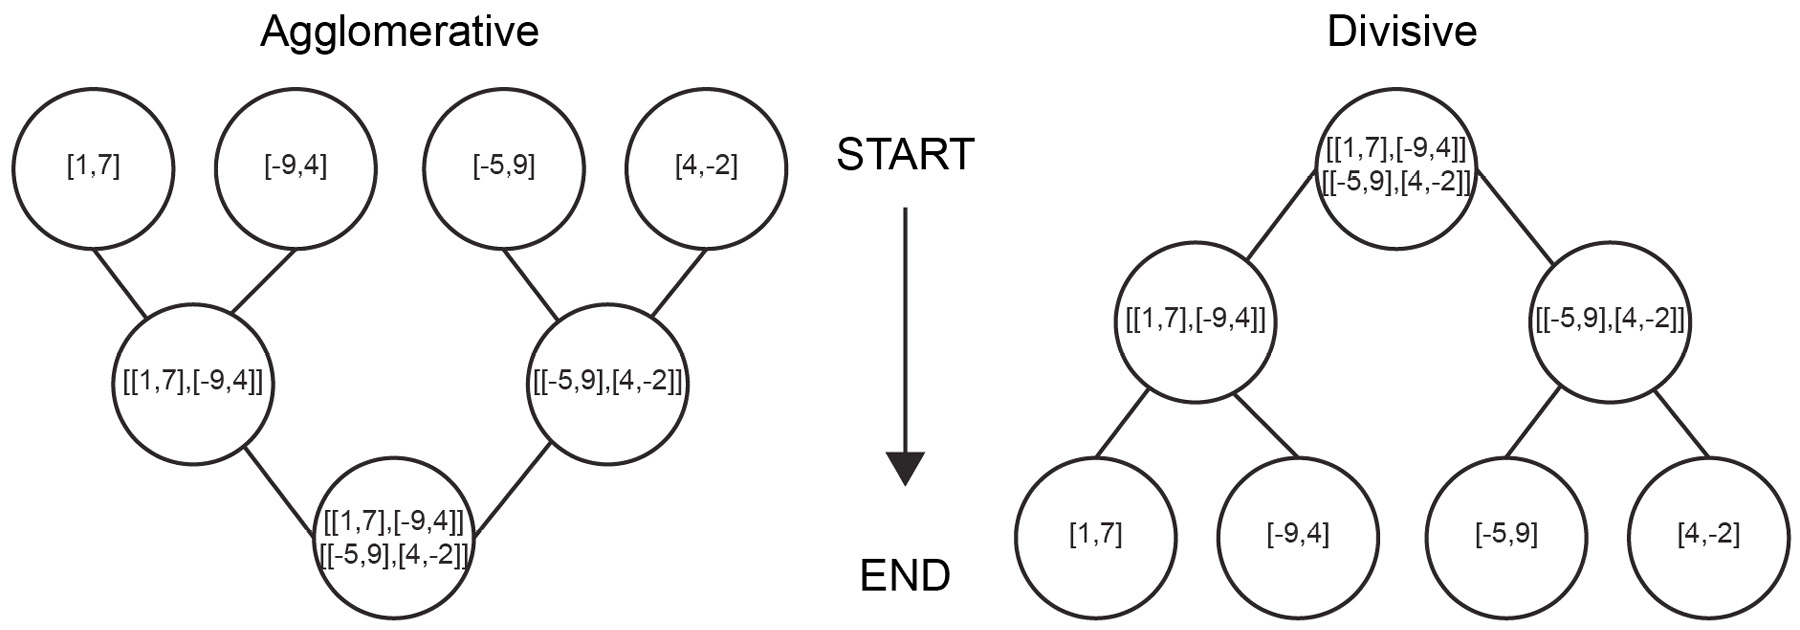

>  the divisive approach has the benefit of seeing the entire data distribution as one from the beginning and choosing the best way to break down clusters. This insight into what the entire dataset looks like is helpful for potentially creating more accurate clusters and should not be overlooked.


- trades off greater accuracy with deeper complexity. In practice, an agglomerative approach works most of the time and should be the preferred starting point when it comes to hierarchical clustering. If, after reviewing the hierarchies, you are unhappy with the results, it may help to take a divisive approach.


#### Here Are Some Quick Highlights For Choosing One Clustering Method Over Another

- Hierarchical clustering benefits from not needing to pass in an explicit "k" number of clusters apriori. This means that you can find all the potential clusters and decide which clusters make the most sense after the algorithm has completed.
- k-means clustering benefits from a simplicity perspective – oftentimes, in business use cases, there is a challenge to find methods that can be explained to non-technical audiences but still be accurate enough to generate quality results. k-means can easily fill this niche.
- Hierarchical clustering has more parameters to tweak than k-means clustering when it comes to dealing with abnormally shaped data. While k-means is great at finding discrete clusters, it can falter when it comes to mixed clusters. By tweaking the parameters in hierarchical clustering, you may find better results.
- Vanilla k-means clustering works by instantiating random centroids and finding the closest points to those centroids. If they are randomly instantiated in areas of the feature space that are far away from your data, then it can end up taking quite some time to converge, or it may never even get to that point. Hierarchical clustering is less prone to falling prey to this weakness.


#### Neighborhood Approaches and DBSCAN
> While you may not get a discrete view into what the target labels are, you can get some semblance of structure out of the data by clustering similar groups together and seeing what is similar within groups. 

>** density-based spatial clustering of applications with noise. As the name implies, this clustering algorithm groups based on the density of points.**

>If there are clumps of data points that all exist in the same area as each other, they can be seen as members of the same cluster: 

> in DBSCAN, we can leave outliers out of clusters if we choose to, based on the hyperparameters we choose at run time. Only the data points that have close neighbors will be seen as members within the same cluster and those that are farther away can be left as unclustered outliers.

- DBSCAN approaches the problem of finding neighbors by applying a notion of density.

**- Dbscan Evaluates Density As A Combination Of Neighborhood Radius And Minimum Points Found In A Neighborhood Deemed A Cluster.**

DBSCAN differs from k-means and hierarchical clustering because you can build this intuition into how we evaluate the clusters of customers we are interested in forming

###### neighborhood radius
- you can have the neighborhood radius be quite high – this can max out at treating all points in the feature space as one massive cluster.
-Too small neighborhood radii can result in no points being clustered together and having a large collection of single member clusters.

###### minimum number of points
-  Minimum points can be seen as a secondary threshold that tunes the neighborhood radius a bit depending on what data you have available in your space. 

-  to make sure you don't just have a large number of uncorrelated data points. When you have very dense data, the minimum points threshold becomes less of a driving factor as opposed to neighborhood radius.


##### DBSCAN Intution
1. Given n unvisited sample data points, move through each point in a loop and mark as visited.
2. From each point, look at the distance to every other point in the dataset.
3. For all points that fall within the neighborhood radius hyperparameter, connect them as neighbors.
4. Check to see whether the number of neighbors is at least as many as the minimum points required.
5. If the minimum point threshold is reached, group together as a cluster. If not, mark the point as noise.
6. Repeat until all data points are categorized in clusters or as noise.

> One great thing to notice about DBSCAN is that it does away with concepts of centroids that we saw in both k-means and a centroid-focused implementation of hierarchical clustering. 

`This feature allows DBSCAN to work better for complex datasets, since most data in the wild is not shaped like clean blobs.`

`db = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')`

 1. neighborhood radius (eps) is set to 0.5, while the 
 	- This epsilon value is converted to a radius that sweeps around any given data point in a circular manner to serve as a neighborhood:
    - eps stands for epsilon and is the distance that your algorithm will look within when searching for neighbors. This epsilon value is converted to a radius that sweeps around any given data point in a circular manner to serve as a neighborhood:
    - 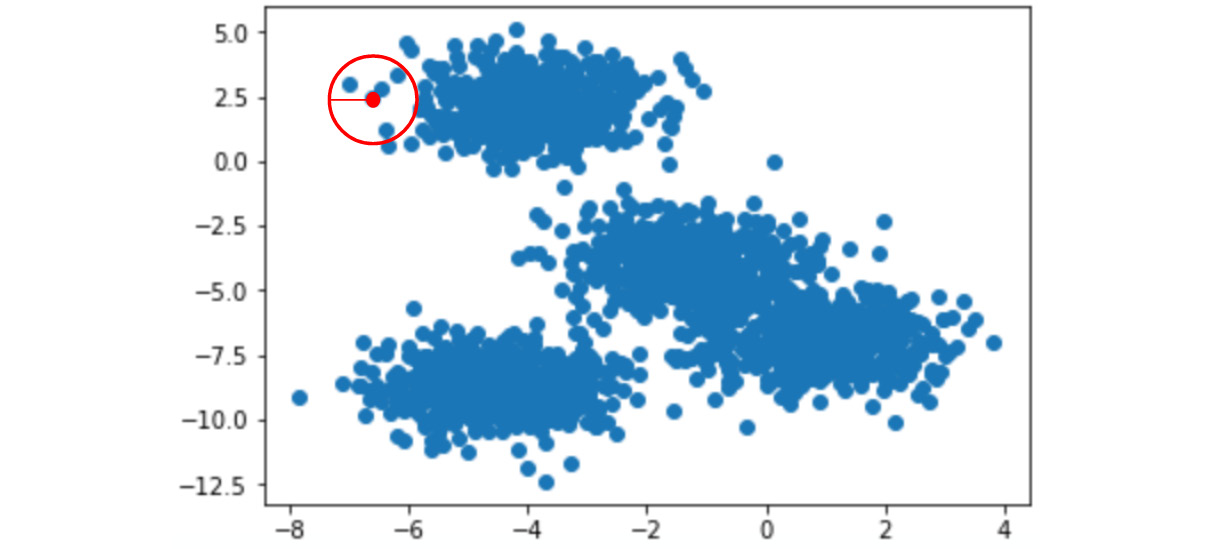
 2. minimum number of points is set to 10
     
 >  If your neighborhood is too small, then you will run into issues where all the data is left unclustered. If you set your neighborhood too large, then all of the data will similarly be grouped together into one cluster and not provide any value
 
 `it is very difficult to land on great clustering using only the neighborhood size. This is where a minimum points threshold comes in handy`
    - the minimum number of points required to justify membership within a cluster.
    - for example. Should these data points be their own cluster, or should they also be categorized as noise? Minimum points thresholding helps solve this problem
    - In real-world scenarios, you can see minimum points being highly impactful when you have truly large amounts of data.

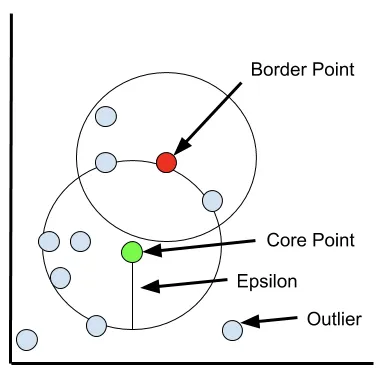

> One key aspect to notice here is that the shape formed by your neighborhood search is a circle in two dimensions, and a sphere in three dimensions.

**Core Points**
Once there are min_samples number of closely located points, any other point that is within the** eps distance** of any of these so-called  is part of that cluster, 

**border points
**even if those other points do not have the **min_samples** number of points within** eps distance around them**. —are called the border points of the cluster.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups together data points that are close to each other and have high density, while ignoring points in low-density regions. Here are the steps of how the algorithm works:

 -  **Define the epsilon (ε) neighborhood around each data point**: DBSCAN requires two input parameters: 

-The model parameters to tune in DBSCAN are:

1.  Epsilon (ε): The radius of the neighborhood around each data point. This parameter defines the distance at which two points are considered to be neighbors. A larger ε value will result in more points being clustered together, while a smaller ε value will result in more fine-grained clusters.
    
2.  Minimum number of points (minPts): The minimum number of points required to form a dense region. This parameter defines the density required for a cluster to form. A higher minPts value will result in fewer, but more dense clusters, while a lower minPts value will result in more, but less dense clusters.

    
4.  Identify core points: **A core point is a data point that has at least minPts points within its ε neighborhood, including itself.**
    
5.  **Expand the clusters:** Starting from a core point, the algorithm identifies all the points within its ε neighborhood. If a point is also a core point, the algorithm expands the cluster to include all the points within its ε neighborhood. This process is repeated until all the points in the dense region have been included in the cluster.
    
**6.  Assign noise points**: Any data point that is not a core point or part of a dense region is classified as a noise point.
    


The hyperparameters of DBSCAN are:

1.  Distance metric: The distance metric used to measure the distance between data points. The most commonly used distance metrics are Euclidean distance and Manhattan distance.
    
2.  Algorithm: The algorithm used to find the nearest neighbors of each data point. The most commonly used algorithms are brute-force search and k-d tree.
---

DBSCAN, a density clustering algorithm which is often used on non-linear or non-spherical datasets

## Pros of DBSCAN

-   Does not require us to pre-determine the number of clusters like KMeans
-   Handles outliers like a champ
-   Can separate high density data into small clusters
-   Can cluster non-linear relationships (finds arbitrary shapes)

## Cons of DBSCAN

-   Struggles to identify clusters within data of varying density
-   Can suffer with high dimensional data
-   Very sensitive to epsilon and minimum points parameters


HDBSCAN (**Hierarchical Density-Based Spatial Clustering of Applications with Noise**) is a hierarchical density-based clustering algorithm that can automatically determine th**e number of clusters in the dat**a. Here are the steps of how the algorithm works:

1. **Build a hierarchical representation of the data**: HDBSCAN first builds a hierarchical representation of the data by **recursively partitioning it into smaller clusters based on the density of the points**. 
	- The algorithm uses a minimum cluster size parameter (**min_cluster_size**) to ensure that only clusters with a certain number of points are formed.
	
	- The model parameters to tune in HDBSCAN are:

			1.  Minimum cluster size (min_cluster_size): The minimum number of points required for a cluster to be formed. This parameter controls the minimum size of the clusters.
			    
			2.  Minimum samples (min_samples): The minimum number of points required for a cluster to be considered valid. This parameter controls the granularity of the clustering.
    
2.  **Condense the hierarchy**: Once the hierarchical representation of the data is built, HDBSCAN condenses it into a **condensed tree**. The condensed tree is a representation of the most salient clusters in the data.
    
3.  E**xtract the clusters:** HDBSCAN then extracts the clusters from the condensed tree by traversing it from the leaves to the root. The algorithm uses a threshold parameter (**min_samples**) to determine the minimum number of points required for a cluster to be considered valid.
    
4.  **Assign noise points**: Any data point that is not part of a cluster is classified as a noise point.

#### The hyperparameters of HDBSCAN are:

1.  **Distance metric:** The distance metric used to measure the distance between data points. The most commonly used distance metrics are Euclidean distance and Manhattan distance.
    
2.  **Algorithm**: The algorithm used to find the nearest neighbors of each data point. The most commonly used algorithms are **brute-force search and k-d tree**.
    
3.  **Clustering selection method:** The method used to select the final set of clusters from the condensed tree. The most commonly used selection methods are 

*single linkage, complete linkage, and average linkage.*

1.  **Single linkage**: Also known as nearest neighbor linkage, this method measures the **distance between the closest pair** of points in two clusters. 
		`This method is sensitive to noise and can result in long, stringy clusters.`
    
2.  **Complete linkage:** Also known as farthest neighbor linkage, this method measures the **distance between the furthest pair of points in two clusters.** 
`This method tends to produce more compact clusters, but can also result in clusters that are too small.`
    
3.  **Average linkage:** This method measures the average distance between all pairs of points in two clusters. 
`This method is less sensitive to noise than single linkage and less likely to produce small, tight clusters than complete linkage.`
    
4.  Ward linkage: This method minimizes the variance within each cluster by measuring the sum of squared differences between each point and the centroid of its cluster. 
`This method tends to produce clusters of equal size and is less sensitive to noise than other methods.`

Here are the main parameters of HDBSCAN:

1.  **Min Cluster Size**: This parameter sets the minimum number of points that must belong to a cluster. **Points that do not belong to a cluster are labeled as noise**. Larger values of this parameter result in fewer but larger clusters, while smaller values result in more but smaller clusters.
    
2.  **Min Sample**s: This parameter sets the minimum number of samples in a neighborhood to form a dense region. This parameter is used to identify the core points that belong to clusters. 
	- **Larger values** of this parameter result in fewer but denser clusters, while **smaller values** result in more but less dense clusters.
    
3.  Metric: This parameter sets the distance metric used to calculate the distance between data points. Common distance metrics include Euclidean distance, Manhattan distance, and cosine similarity.
    
4.  Algorithm: This parameter sets the algorithm used to compute the pairwise distances between data points. Common algorithms include "ball_tree", "kd_tree", and "brute". **The choice of algorithm can have a significant impact on the runtime of the algorithm.**
    
5.  Alpha: This parameter sets the minimum spanning tree pruning level. 
	- Larger values of alpha result in fewer and larger clusters, 
	- smaller values result in more and smaller clusters.
    
6.  Leaf Size: This parameter sets the size of the leaf nodes used in the clustering algorithm. 
	- Larger values of leaf size can speed up the algorithm but may also result in less accurate clustering.



Here are some of the pros and cons of HDBSCAN:

Pros:

1.  HDBSCAN is capable of discovering clusters of varying densities, shapes, and sizes. It can handle complex and irregularly shaped clusters that other algorithms like K-means or DBSCAN may struggle with.
2.  HDBSCAN is more robust to noise and outliers than other clustering algorithms, 
3.  HDBSCAN uses a hierarchical approach that allows users to explore different levels of granularity in the clustering results, providing more flexibility and insight into the data.
4.  HDBSCAN is relatively easy to use and requires minimal input parameters.

Cons:

1.  HDBSCAN can be computationally expensive, especially for large datasets. The algorithm involves building a hierarchical tree and performing multiple clustering steps, which can be time-consuming and memory-intensive.
2.  HDBSCAN may not perform well on datasets with a low signal-to-noise ratio, as it can result in overfitting or underfitting of the data. It may also struggle with datasets with very low , where it may produce too many or too few clusters.
3.  HDBSCAN may **not be suitable for datasets with a clear underlying structure,** as it can produce clusters that are difficult to interpret 

`Density-Based Cluster Validation (DBCV)`
>  is a method to evaluate the quality of clusters produced by density-based clustering algorithms such as DBSCAN and HDBSCAN. 
It assesses the internal clustering structure by `measuring the average similarity of each data point to its cluster` and the `average similarity of each cluster to its neighboring clusters`. The DBCV score ranges from 0 to 1, with higher values indicating better clustering quality.

Here's an example of how to use DBCV in Python to evaluate the clustering results of DBSCAN:

project:
https://towardsdatascience.com/clustering-sentence-embeddings-to-identify-intents-in-short-text-48d22d3bf02e

- For our current application, it is preferable to use an algorithm that does not require specifying the number of clusters upfront and can also tolerate noisy data.
- , Silhouette Score is not a good validation metric for density-based algorithms like DBSCAN and HDBSCAN since it assumes all points are assigned a group and can’t appropriately handle noise/outliers.
- Instead, we’ll leverage the useful `probabilities_` HDBSCAN attribute, which from the documentation is:

> 
    - The strength with which each sample is a member of its assigned cluster. 
    - Noise points have probability zero; 
    
    `points in clusters have values assigned proportional to the degree that they persist as part of the cluster.`

- Hierarchical (agglomerative) clustering is too sensitive to noise in the data.
- Centroid-based clustering (K-means, Gaussian Mixture Models) can handle only clusters with `spherical or ellipsoidal symmetry`.

There are two types of evaluation metrics for clustering,

- Extrinsic Measures: These measures require ground truth labels, which may not be available in practice

- Intrinsic Measures: These measures do not require ground truth labels (applicable to all unsupervised learning results)


## **Extrinsic Measures**

-   [Rand Index](https://medium.com/p/bdc537ff54d2/#7226)
-   [Mutual Information](https://medium.com/p/bdc537ff54d2/#ebd4)
-   [V-measure](https://medium.com/p/bdc537ff54d2/#7bda)
-   [Fowlkes-Mallows Scores](https://medium.com/p/bdc537ff54d2/#2a9e)

## Intrinsic Measures

-   [Silhouette Coefficient](https://medium.com/p/bdc537ff54d2/#2071)
-   [Calinski-Harabasz Index](https://medium.com/p/bdc537ff54d2/#949d)
-   [Davies-Bouldin Index](https://medium.com/p/bdc537ff54d2/#5f41)


#### . Calinski-Harabasz Index

> Calinski-Harabasz Index measures the between-cluster dispersion against within-cluster dispersion. A higher score signifies better-defined clusters.

#### Davies-Bouldin Index

> Davies-Bouldin Index measures the size of clusters against the average distance between clusters. A lower score signifies better-defined clusters.

![Table 1: Characteristics of Clustering Algorithms — Image by author](https://miro.medium.com/v2/resize:fit:875/1*hXuKtq71Gsa06rJeZa1K6A.png)


## QnA
---

### what is mean-shift clustering ?
- Mean-shift clustering is a non-parametric clustering algorithm that does not require prior knowledge of the number of clusters or their shapes
- it iteratively shifts a window or kernel over the data points to find the local maximum of a density function
- hich represents the mode of the data distribution. The data points within a given window are then assigned to the same cluster.
#### Steps
- First, we define a kernel function, such as a Gaussian kernel, which is centered at a data point and has a bandwidth that determines the size of the window. 
- The kernel function is used to calculate the density at each data point.

- Next, we randomly select a data point as the starting point of a cluster
- . We apply the kernel function to this point to compute the density at the neighboring points within the specified bandwidth. 
- We then shift the window to the point with the highest density, and repeat the process until convergence, i.e., when the window no longer moves or the distance between the current and previous centroids is below a threshold.

---
What is difference in kmeans and kmeans++ ?

K-means and K-means++ are both clustering algorithms used to group similar data points together. 
However, K-means++ is an improvement over K-means that aims to choose b**etter initial centroids for the algorithm to converge faster and to potentially produce better results.**

#### selecting initial centroids
K-means chooses random initial centroids, which can lead to suboptimal results depending on the initial starting point.

 K-means++ improves upon this by selecting initial centroids that a**re spread out from each other, reducing the chances of getting stuck in local optima.**

Now let's use K-means++ to choose initial centroids for K-means. The algorithm works as follows:

1.  Choose the first centroid randomly from the data points.
2.  For each remaining data point, **calculate its distance from the nearest centroid**.
3. Choose the next centroid randomly from the data points with **probability proportional to the square of the distance from the nearest centroid.**
4.  Repeat step 2 until all centroids have been chosen.


 **What is the objective of clustering?**
 Answer: The objective of clustering is to group similar data points together while keeping dissimilar data points apart.

**What are the different types of clustering algorithms?** 
 
 The two main types of clustering algorithms are 
 - hierarchical clustering 
 - partitioning clustering. '

> Hierarchical clustering involves creating a tree-like structure of clusters, while partitioning clustering involves dividing the data into non-overlapping subsets.
> Hierarchical clustering is a type of clustering algorithm that creates a tree-like structure of clusters by repeatedly merging or splitting clusters based on their similarity.
    
2.  What is agglomerative hierarchical clustering?

> The advantages of K-means clustering include its simplicity, efficiency, and ability to handle large datasets using cosine based distnace

**1.  What is the elbow method in K-means clustering?** 
2.The elbow method is a technique used to determine the optimal number of clusters for K-means clustering by plotting **the sum of squared distances between each data point and its assigned centroid for different values of K and choosing the K value at the "elbow" of the curve.**

 -  **What is divisive hierarchical clustering?
> Divisive hierarchical clustering is a type of hierarchical clustering algorithm that starts with all the data points in a single cluster and iteratively splits the cluster into smaller clusters until each data point is in its own cluster.
> 
 - Agglomerative hierarchical clustering merges clusters.  
 - divisive hierarchical clustering splits clusters.


 -  What is density-based clustering? 
> Density-based clustering is a type of clustering algorithm that identifies clusters based on **regions of high density in the data.**
    
 -  What is DBSCAN? 
>  DBSCAN is a density-based clustering algorithm that groups together data points that are close to each other and have high density, **while ignoring points in low-density regions.**
    
 What is the difference between K-means and DBSCAN? 
 - K-means is a centroid-based clustering algorithm that requires a
   pre-specified number of clusters.  
  -  while DBSCAN is a **density-based clustering *algorithm that can identify arbitrary-shaped clusters and does not require the number of c*lusters to be specified in
   advance.**

    
5.  What is spectral clustering?
-  Spectral clustering is a type of clustering algorithm that uses the eigenvalues and eigenvectors of a similarity matrix to group data points together.

6.  What is the curse of dimensionality in clustering? 
> The curse of dimensionality refers to the difficulty of clustering high-dimensional data. As the **number of dimensions in the data increases, the amount of space between data points also increases,** making it difficult to identify meaningful clusters.


#### Clustering Evluation

1.  **Silhouette Coefficient**: The Silhouette Coefficient measures the similarity of a point to its own cluster compared to other clusters. The score ranges from -1 to 1, with higher scores indicating better clustering results.
    
2.  **Davies-Bouldin Index:** The Davies-Bouldin Index measures the average similarity between each cluster and its most similar cluster. **Lower scores indicate better clustering results.**
    
3.  **Calinski-Harabasz Index:** The Calinski-Harabasz Index measures the ratio of between-cluster variance to within-cluster variance**. Higher scores indicate better clustering results.**
    
4.  **Visual Inspection:** The clustering results can be evaluated visually by plotting the data points in the low-dimensional space and inspecting the resulting clusters. This can help to **identify any outliers, noise points, or incorrectly assigned points.**
    
5.  **Domain-specific Metrics**: The choice of evaluation metric can also depend on the specific domain or application of the clustering results. For example, in bioinformatics, t**he clustering results may be evaluated using measures such as homogeneity, completeness, and V-measure.**


---
 You have a dataset with both categorical and numerical variables. How would you handle the categorical variables when clustering the data?
 - Clustering algorithms typically work with numerical data, so it is
   important to convert categorical variables to numerical ones.  
 - One approach is to use one-hot encoding to create binary variables for
   each category. 
 - Another approach is to use a distance metric that can handle categorical variables, such as **Gower's distance.** .
 - It is also important to scale the numerical variables to ensure that they have
   the same impact on the clustering results.

You are working on a dataset with imbalanced classes. How would you approach clustering the data to ensure that the smaller classes are not overlooked?

> approach is to use hierarchical clustering with a stratified sampling approach, where each cluster is sampled in proportion to the class distribution.

4.  You have a dataset with missing values. How would you handle the missing values when clustering the data?

- Missing values can be a problem for clustering algorithms because they can distort the distance metrics. 
- One approach is to impute the missing values using techniques such as mean imputation, median imputation, or k-NN imputation. 
- **Another approach is to use clustering algorithms that can handle missing values, such as k-Prototypes or Fuzzy C-Means.**


6.  You have a dataset with highly correlated features. How would you handle the correlation when clustering the data?

- **Highly correlated features can lead to redundancy in the clustering results, so it is important to handle the correlation appropriately.** 
- One approach is to use feature selection techniques such as 
	- **correlation-based feature selection** or 
	- **mutual information-based feature selection** to select a subset of features. 
- Another approach is to use dimensionality reduction techniques such as PCA to reduce the number of highly correlated features.

> which compare the clustering results to a ground truth. 
> Another approach is to use internal evaluation metrics such as silhouette score or Davies-Bouldin inde**x, which measure the compactness and separation of the clusters**.

8.  You have a dataset with class labels. How would you approach clustering the data to ensure that the clustering results are consistent with the class labels?

- One approach is to use semi-supervised clustering algorithms such as **constrained K-Means or co-regularized spectral clustering**, which incorporate the class labels into the clustering process. 
- Another approach is to use clustering algorithms to generate a **set of candidate clusters**, and then evaluate the clustering performance using external evaluation metrics.

10.  You are working on a dataset with non-uniform density clusters. How would you approach clustering the data to ensure that the algorithm is robust to the density variations?

- Clustering algorithms can be sensitive to non-uniform density clusters, especially if the clusters have different shapes or sizes.
-  One approach is to use density-based clustering algorithms such as DBSCAN or HDBSCAN, which can identify clusters of different shapes and sizes.
-  Another approach is to use clustering algorithms that are robust to density variations, such as **OPTICS or mean-shift clustering.**



#### UMAP

- UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that can be used for clustering and visualization of high-dimensional data.
- UMAP works by learning a low-dimensional representation of the data that preserves t**he local structure of the data points.** .
- In other words, UMAP tries to find a 2D or 3D representation of the data that **maintains the pairwise distances between the data points as much as possible.**
##### It works by 
	-  constructing a neighborhood graph, 
	-  assigning weights to the edges, 
	-  optimizing the low-dimensional embedding, and
	-  transforming the embedding into a visualizable space

UMAP has several advantages over other dimensionality reduction techniques such as t-SNE and PCA.
 - It is computationally efficient and can handle large datasets with millions of data points.
 - It can also preserve the global structure of the data while maintaining the local structure, which makes it useful for clustering and visualization. 
 - Additionally, UMAP is parameterized by a few hyperparameters, such as 
	 - the number of neighbors and 
   	 - the learning rate,
- which can be easily tuned to achieve the desired clustering or visualization results.

UMAP has several hyperparameters that can be tuned to optimize the dimensionality reduction process. Some of the most important parameters include:

1.  **n_neighbors**: The number of nearest neighbors to consider when constructing the high-dimensional graph. **This parameter controls the local structure preservation in the resulting low-dimensional space**. 
> A higher number of neighbors can lead to better preservation of the local structure but can also increase the computational cost.
    
2.  **min_dist**: The minimum distance between points in the low-dimensional space. This parameter controls the **density of the low-dimensional embeddin**g and can be used to prevent points from being too close to each other.
>  A lower value of min_dist can lead to better separation between clusters but can also increase the risk of overfitting.
    
3.  **n_components**: The number of dimensions in the low-dimensional embedding. This parameter determines the final dimensionality of the embedding and can be used to reduce the dimensionality of high-dimensional data. 
> A lower number of components can increase the computational speed but may also lead to loss of information.
    
5.  metric: The metric used to calculate the distances between points in the high-dimensional space. UMAP supports a variety of metrics, including Euclidean distance, Manhattan distance, cosine distance, and others.
    
6.  learning_rate: The learning rate used during the optimization process. This parameter controls the speed at which the algorithm converges and can be used to balance the speed and accuracy of the dimensionality reduction process.
    
7.  **spread**: The initial spread of the low-dimensional embedding. This parameter controls the variance of the Gaussian distribution used to initialize the embedding and can affect the final clustering results